### **Set-up and data loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import streamlit as st

In [2]:
df = pd.read_csv('Call_Center_Dataset.csv', parse_dates= ['Date'] ) #loading the csv and converting the date to datetime 
display(df.head())
df.info()

,Call Id,Agent,Date,Time,Topic,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Call Id                     5000 non-null   object        
 1   Agent                       5000 non-null   object        
 2   Date                        5000 non-null   datetime64[ns]
 3   Time                        5000 non-null   object        
 4   Topic                       5000 non-null   object        
 5   Answered (Y/N)              5000 non-null   object        
 6   Resolved                    5000 non-null   object        
 7   Speed of answer in seconds  4054 non-null   float64       
 8   AvgTalkDuration             4054 non-null   object        
 9   Satisfaction rating         4054 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 390.8+ KB


In [3]:
df.describe()

,Date,Speed of answer in seconds,Satisfaction rating
count,5000,4054.000000,4054.000000
mean,2021-02-13 05:32:38.400000256,67.520720,3.403552
min,2021-01-01 00:00:00,10.000000,1.000000
25%,2021-01-23 00:00:00,39.000000,3.000000
50%,2021-02-13 00:00:00,68.000000,3.000000
75%,2021-03-06 00:00:00,97.000000,4.000000
max,2021-03-31 00:00:00,125.000000,5.000000
std,NaN,33.592872,1.212220


## **Data cleaning**

In [4]:
# Checking for duplicate values
df.duplicated().sum()

0

In [5]:
# Cleaning column names
df.columns = (
    df.columns.str.strip()                             # Remove leading/trailing spaces
              .str.replace(' ', '_')                   # Replace spaces with underscores
              .str.replace(r'\W+', '', regex=True)     # Remove non-alphanumeric characters
              .str.lower()                             # Lowercase everything
)

print(df.columns)

#converting the avgtalkduration column to a timedelta series
df['avgtalkduration'] = pd.to_timedelta(df['avgtalkduration'])

# converting time to datetime.time
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time


df.time.head()

Index(['call_id', 'agent', 'date', 'time', 'topic', 'answered_yn', 'resolved',
       'speed_of_answer_in_seconds', 'avgtalkduration', 'satisfaction_rating'],
      dtype='object')


0    09:12:58
1    09:12:58
2    09:47:31
3    09:47:31
4    10:00:29
Name: time, dtype: object

In [6]:
# Extracting the hour into a column
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['hour']. head()

0     9
1     9
2     9
3     9
4    10
Name: hour, dtype: int32

In [7]:
# Filling missing data with mean values for each column

df['speed_of_answer_in_seconds']= df['speed_of_answer_in_seconds'].fillna(df['speed_of_answer_in_seconds'].mean())
df['satisfaction_rating']= df['satisfaction_rating'].fillna(df['satisfaction_rating'].mean())
df['avgtalkduration'] = df['avgtalkduration'].fillna(df['avgtalkduration'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   call_id                     5000 non-null   object         
 1   agent                       5000 non-null   object         
 2   date                        5000 non-null   datetime64[ns] 
 3   time                        5000 non-null   datetime64[ns] 
 4   topic                       5000 non-null   object         
 5   answered_yn                 5000 non-null   object         
 6   resolved                    5000 non-null   object         
 7   speed_of_answer_in_seconds  5000 non-null   float64        
 8   avgtalkduration             5000 non-null   timedelta64[ns]
 9   satisfaction_rating         5000 non-null   float64        
 10  hour                        5000 non-null   int32          
dtypes: datetime64[ns](2), float64(2), int32(1),

In [8]:
#converting "resolved" column into a numeric value
df['resolved_numeric'] = df['resolved'].map({'Y': 1, 'N': 0})
df.head()

,call_id,agent,date,time,topic,answered_yn,resolved,speed_of_answer_in_seconds,avgtalkduration,satisfaction_rating,hour,resolved_numeric
0,ID0001,Diane,2021-01-01,1900-01-01 09:12:58,Contract related,Y,Y,109.0,0 days 00:02:23,3.0,9,1
1,ID0002,Becky,2021-01-01,1900-01-01 09:12:58,Technical Support,Y,N,70.0,0 days 00:04:02,3.0,9,0
2,ID0003,Stewart,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,10.0,0 days 00:02:11,3.0,9,1
3,ID0004,Greg,2021-01-01,1900-01-01 09:47:31,Contract related,Y,Y,53.0,0 days 00:00:37,2.0,9,1
4,ID0005,Becky,2021-01-01,1900-01-01 10:00:29,Payment related,Y,Y,95.0,0 days 00:01:00,3.0,10,1


### Analysis to answer questions on drivers of customer satisfaction

#### **Q1**: How does **call duration** relate to satisfaction ratings?

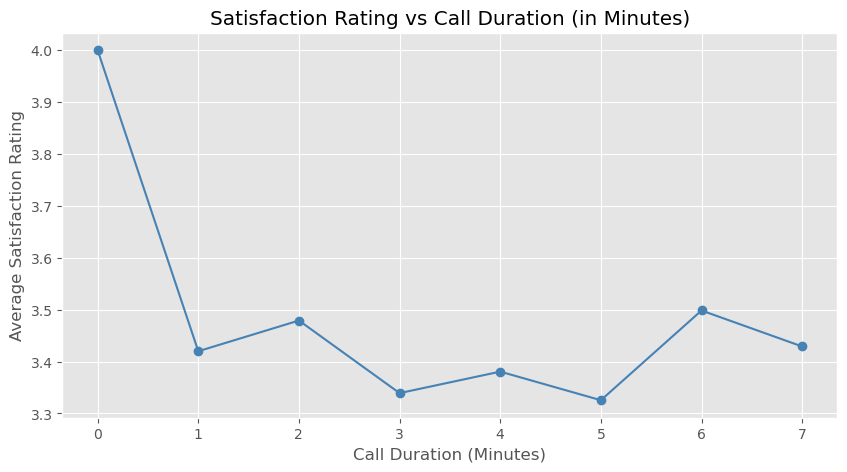

In [15]:
# Convert timedelta to total minutes
df['talk_minutes'] = df['avgtalkduration'].dt.total_seconds() / 60
df['talk_minutes_rounded'] = df['talk_minutes'].round()

# Group by talk duration and calculate average satisfaction
duration_vs_satisfaction = df.groupby('talk_minutes_rounded')['satisfaction_rating'].mean()

# Plot
duration_vs_satisfaction.plot(kind='line', figsize=(10, 5), marker='o', color= 'steelblue')
plt.title("Satisfaction Rating vs Call Duration (in Minutes)")
style.use('ggplot')
plt.xlabel("Call Duration (Minutes)")
plt.ylabel("Average Satisfaction Rating")
plt.grid(True)
plt.show()

##### Keeping call durations under one minute is linked to higher satisfaction scores, indicating that faster interactions may enhance the customer experience.

Streamlining issue resolution could help improve service satisfaction.

#### **Q2**: Does the **speed of answer** impact satisfaction?


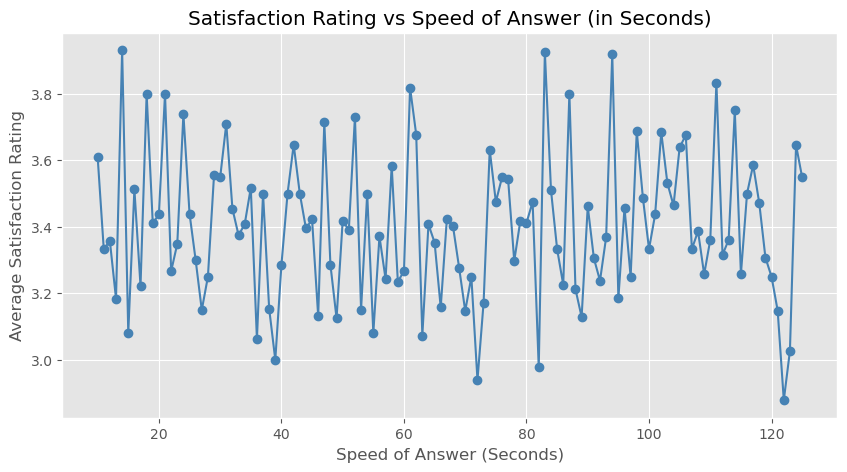

In [10]:
# Round to nearest second (or nearest 5 for less granularity)
df['speed_rounded'] = df['speed_of_answer_in_seconds'].round()

speed_vs_satisfaction = df.groupby('speed_rounded')['satisfaction_rating'].mean()

speed_vs_satisfaction.plot(kind='line', figsize=(10, 5), marker='o', color= 'steelblue')
plt.title("Satisfaction Rating vs Speed of Answer (in Seconds)")
plt.xlabel("Speed of Answer (Seconds)")
plt.ylabel("Average Satisfaction Rating")
plt.grid(True)
plt.show()

In [11]:
corr = df[['speed_of_answer_in_seconds', 'satisfaction_rating']].corr()
print(corr)


                            speed_of_answer_in_seconds  satisfaction_rating
speed_of_answer_in_seconds                    1.000000             0.000952
satisfaction_rating                           0.000952             1.000000


##### Quick response times alone do not lead to higher satisfaction ratings, indicating that what happens during the call may be more important than how quickly it's answered. Calls answered after the 2-minute mark noticeably rank lower.

Focus should shift toward enhancing call quality and issue resolution.

#### **Q3**:  Does the **hour of day** impact satisfaction?

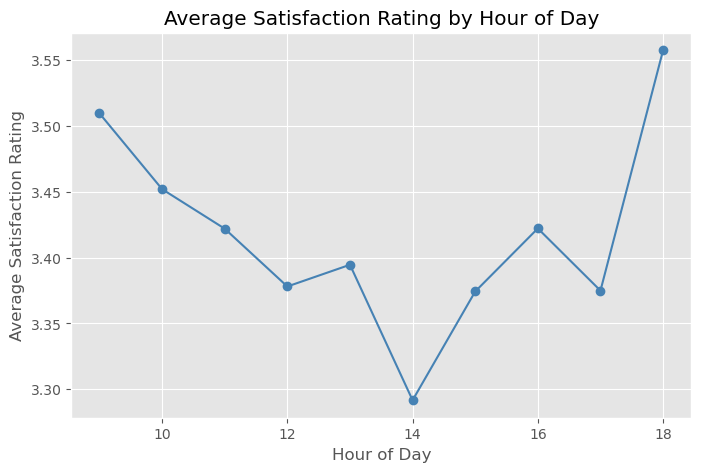

In [12]:
hourly_satisfaction = df.groupby('hour')['satisfaction_rating'].mean()

hourly_satisfaction.plot(kind='line', marker='o', figsize=(8,5), color= 'steelblue')
plt.title("Average Satisfaction Rating by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Satisfaction Rating")
plt.grid(True)
plt.show()

##### Customer satisfaction ratings dip noticeably around 2 PM before rising again at 6 PM.

This trend suggests a need for further investigation into what occurs during the 2 PM period that may be impacting service quality

#### **Q4**: Does the day of the week affect satisfaction ratings?

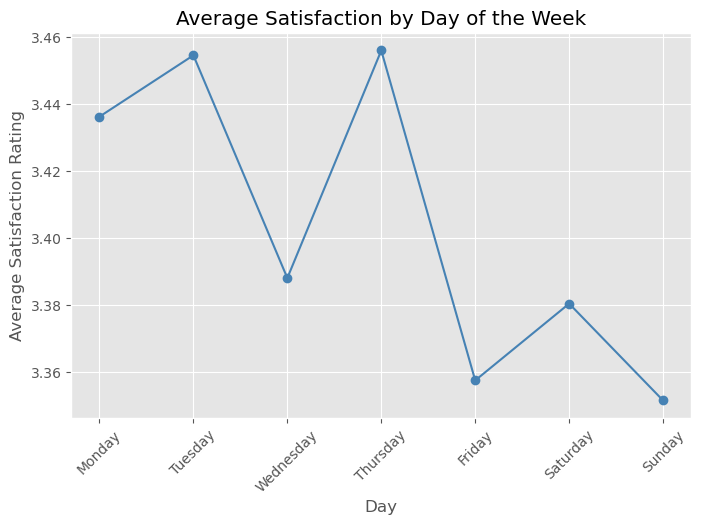

In [13]:
# Get day name
df['day_of_week'] = df['date'].dt.day_name()

# Define order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group and plot
avg_satisfaction_by_day = df.groupby('day_of_week')['satisfaction_rating'].mean().reindex(days_order)

avg_satisfaction_by_day.plot(figsize=(8, 5), marker = 'o', color= 'steelblue')
plt.title("Average Satisfaction by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Average Satisfaction Rating")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

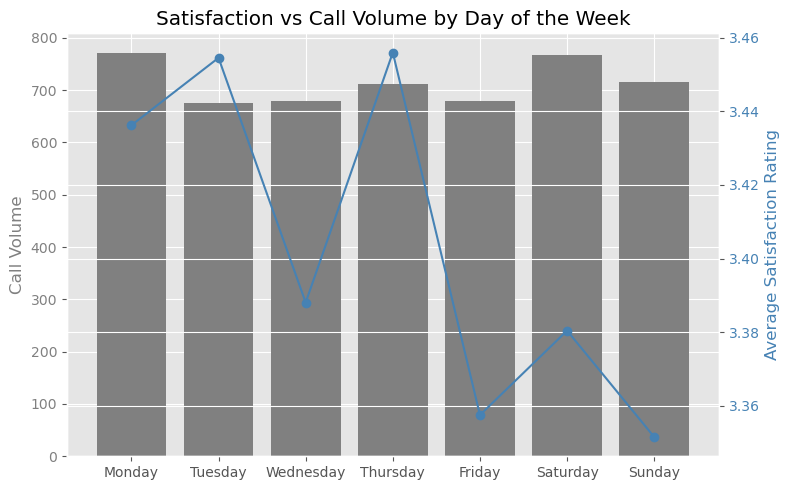

In [23]:
# Checking if there is a correlation betweeen volume of calls and avaerage satisfaction rating per day
# Converting 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day of week as ordered category
df['day_of_week'] = pd.Categorical(
    df['date'].dt.day_name(),
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

# Group by day
summary = df.groupby('day_of_week', observed = True).agg({
    'satisfaction_rating': 'mean',
    'call_id': 'count'  # assuming 'call id' is unique per call
}).rename(columns={'call_id': 'call_volume'})

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: call volume
ax1.bar(summary.index, summary['call_volume'], color='grey', label='Call Volume')
ax1.set_ylabel('Call Volume', color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

# Line chart: satisfaction
ax2 = ax1.twinx()
ax2.plot(summary.index, summary['satisfaction_rating'], marker= 'o',color='steelblue', label='Avg Satisfaction')
ax2.set_ylabel('Average Satisfaction Rating', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

# Titles and labels
plt.title("Satisfaction vs Call Volume by Day of the Week")
fig.tight_layout()
plt.show()

In [30]:
correlation = summary['call_volume'].corr(summary['satisfaction_rating'])
print(f"Correlation between call volume and satisfaction: {correlation:2f}")

Correlation between call volume and satisfaction: 0.044901


##### Satisfaction ratings drop on Fridays, Saturdays, and Sundays, but this decline is not linked to call volume.

Further investigation into service quality or staffing factors during weekends may be needed.

#### Q5: Do certain **call topics** consistently result in higher or lower satisfaction?

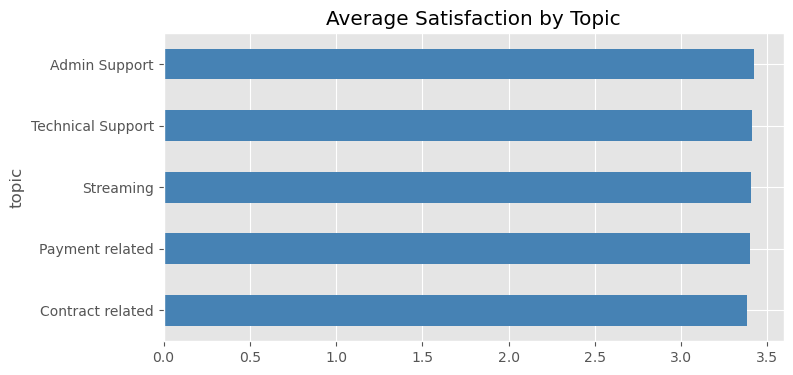

In [21]:
topic_rating = df.groupby('topic')['satisfaction_rating'].mean().sort_values()
plt.figure(figsize= (8,4))
topic_rating.plot(kind='barh', title='Average Satisfaction by Topic', color= 'steelblue')
plt.show()

##### Satisfaction levels remain relatively consistent regardless of the call topic, suggesting that factors other than topic drive customer satisfaction.

#### **Q6:** Are there noticeable differences in **agent performance** based on satisfaction ratings?

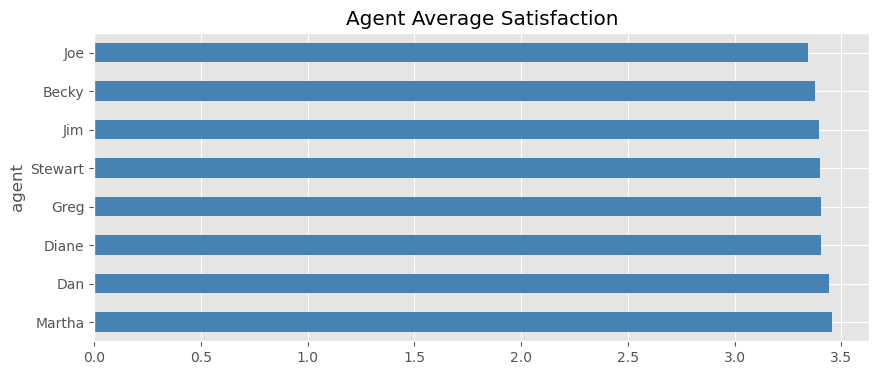

In [22]:
agent_perf = df.groupby('agent')['satisfaction_rating'].mean().sort_values(ascending=False)
plt.figure(figsize= (8,4))
agent_perf.plot(kind='barh', figsize=(10,4), title='Agent Average Satisfaction', color= 'steelblue')
plt.show()

##### Agent performance appears consistent, with no significant impact on customer satisfaction ratings.

### **Conclusion**
The analysis of Q1 2021 support call data shows that customer satisfaction at Halo is driven more by **call quality** and **resolution efficiency** than by response speed, call topic, or agent identity.

**Key findings:**

1. **Shorter calls (<1 min)** correlate with higher satisfaction.

2. **Answer speed** has minimal impact on satisfaction.

3. **Satisfaction consistently dips around 2 PM each day and remains lower on weekends**, with no correlation to call volume, suggesting other operational or customer experience factors may be affecting performance.

4. **Call topic and agent** differences show no significant influence on ratings.

The customer support department should shift its focus towards improving resolution quality and investigating time-based performance patterns to enhance customer satisfaction.

### **Creating a .py file Streamlit Interactive dashboard to present findings**

In [ ]:
%%writefile call_dashboard.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Page setup
st.set_page_config(page_title="📞 Call Metrics: Unpacking Support Satisfaction", layout="centered")

# Title
st.title("📞 Call Metrics: Unpacking Support Satisfaction")
st.write("The Customer Support team at Halo, a subscription-based digital content platform, is analyzing support call data for Q1 of 2021 to understand what drives customer satisfaction. This project explores patterns in call metadata, agent performance, and customer outcomes to identify ways to improve service quality.")
st.markdown("[Click here to explore the project code on GitHub.](https://github.com/Grace-OO/Call_Metrics/tree/main)")

# Load data
@st.cache_data
def load_data():
    df = pd.read_csv("Call_Center_Dataset.csv")
    df.columns = (
    df.columns.str.strip()                             # Remove leading/trailing spaces
              .str.replace(' ', '_')                   # Replace spaces with underscores
              .str.replace(r'\W+', '', regex=True)     # Remove non-alphanumeric characters
              .str.lower())                             # Lowercase everything

    df['date'] = pd.to_datetime(df['date'])
    df['avgtalkduration'] = pd.to_timedelta(df['avgtalkduration'])
    df['talk_minutes'] = df['avgtalkduration'].dt.total_seconds() / 60
    df['talk_minutes_rounded'] = df['talk_minutes'].round()
    df['speed_of_answer_in_seconds']= df['speed_of_answer_in_seconds'].fillna(df['speed_of_answer_in_seconds'].mean())
    df['satisfaction_rating']= df['satisfaction_rating'].fillna(df['satisfaction_rating'].mean())
    df['avgtalkduration'] = df['avgtalkduration'].fillna(df['avgtalkduration'].mean())
    df['day_of_week'] = pd.Categorical(
        df['date'].dt.day_name(),
        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        ordered=True
    )
    df['speed_rounded'] = df['speed_of_answer_in_seconds'].round()
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
    df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour
    return df

df = load_data()

# Sidebar filters
st.sidebar.header("📊 Filters")

# Date range filter
min_date = df['date'].min()
max_date = df['date'].max()
start_date, end_date = st.sidebar.date_input("Select date range:", [min_date, max_date], min_value=min_date, max_value=max_date)

# Day of week filter
days = st.sidebar.multiselect("Select days of the week:", options=df['day_of_week'].cat.categories, default=list(df['day_of_week'].cat.categories))

# Chart toggles
show_chart1 = st.sidebar.checkbox("📈 Satisfaction vs Talk Duration", value=True)
show_chart2 = st.sidebar.checkbox("📈 Satisfaction vs Speed of Answer", value=True)
show_chart3 = st.sidebar.checkbox("📈 Satisfaction by Hour", value=True)
show_chart4 = st.sidebar.checkbox("📈 Satisfaction by Day", value=True)
show_chart5 = st.sidebar.checkbox("📈 Satisfaction by Topic", value=True)
show_chart6 = st.sidebar.checkbox("📈 Satisfaction by Agent", value=True)
# Filtered data
filtered_df = df[
    (df['date'] >= pd.to_datetime(start_date)) &
    (df['date'] <= pd.to_datetime(end_date)) &
    (df['day_of_week'].isin(days))
]

# Charts

if show_chart1:
    st.subheader("**1. How does call duration relate to satisfaction ratings?**")
    
    duration_satisfaction = filtered_df.groupby('talk_minutes_rounded')['satisfaction_rating'].mean()
    style.use('ggplot')
    fig, ax = plt.subplots(figsize= (10,7))
    duration_satisfaction.plot(kind='line', marker='o', ax=ax, color= 'steelblue')
    ax.set_title("Satisfaction vs Call Duration")
    ax.set_xlabel("Call Duration (minutes)")
    ax.set_ylabel("Average Satisfaction Rating")
    ax.grid(True)
    st.pyplot(fig)
    st.write("""
    Keeping call durations under one minute is linked to higher satisfaction scores, indicating that faster interactions may enhance the customer experience.
    
    Streamlining issue resolution could help improve service satisfaction.
    """)

if show_chart2:
    st.subheader("**2. Does the speed of answer impact satisfaction?**")

    speed_satisfaction = filtered_df.groupby('speed_rounded')['satisfaction_rating'].mean()

    fig2, ax = plt.subplots(figsize= (10,7))
    speed_satisfaction.plot(kind='line', marker='o', ax=ax, color= 'steelblue')
    ax.set_title("Satisfaction vs Speed of Answer")
    ax.set_xlabel("Speed of Answer (seconds)")
    ax.set_ylabel("Average Satisfaction Rating")
    ax.grid(True)
    st.pyplot(fig2)
    st.write("""
    Quick response times alone do not lead to higher satisfaction ratings, indicating that what happens during the call may be more important than how quickly it's answered. Calls answered after the 2-minute mark noticeably rank lower.

    Focus should shift toward enhancing call quality and issue resolution.
    """)

if show_chart3:
    st.subheader("**3. Does the hour of day impact satisfaction?**")
    
    hourly_satisfaction = filtered_df.groupby('hour')['satisfaction_rating'].mean()

    fig3, ax = plt.subplots(figsize= (10,7))
    hourly_satisfaction.plot(kind='line', marker='o', ax=ax, color= 'steelblue')
    ax.set_title("Satisfaction by Hour of Day")
    ax.set_xlabel("Hour")
    ax.set_ylabel("Avg Satisfaction Rating")
    ax.grid(True)
    st.pyplot(fig3)
    st.write("""
    Customer satisfaction ratings dip noticeably around 2 PM before rising again at 6 PM. 
    
    This trend suggests a need for further investigation into what occurs during the 2 PM period that may be impacting service quality
    """)


if show_chart4: 
    st.subheader("**4. Does the day of the week affect satisfaction ratings?**")
    avg_satisfaction_by_day = filtered_df.groupby('day_of_week')['satisfaction_rating'].mean()

    fig4, ax = plt.subplots(figsize= (10,7))
    avg_satisfaction_by_day.plot(kind= 'line', ax=ax, marker= 'o', color= 'steelblue')
    ax.set_title("Average Satisfaction by Day of the Week")
    ax.set_xlabel("Day")
    ax.set_ylabel("Average Satisfaction Rating")
    ax.set_xticks(range(len(avg_satisfaction_by_day.index)))
    ax.set_xticklabels(avg_satisfaction_by_day.index, rotation=45)
    ax.grid(True)
    st.pyplot(fig4)
    st.write("Satisfaction ratings drop on Fridays, Saturdays, and Sundays, but this decline is not linked to call volume.")
    summary = filtered_df.groupby('day_of_week', observed=True).agg({
        'satisfaction_rating': 'mean',
        'call_id': 'count'
    }).rename(columns={'call_id': 'call_volume'})

    fig, ax1 = plt.subplots(figsize= (10,7))
    ax1.bar(summary.index, summary['call_volume'], color='darkgray', label='Call Volume')
    ax2 = ax1.twinx()
    ax2.plot(summary.index, summary['satisfaction_rating'], color='steelblue', marker='o', label='Satisfaction')
    ax1.set_ylabel("Call Volume")
    ax2.set_ylabel("Avg Satisfaction Rating")
    ax1.set_title("Satisfaction and Call Volume by Day")
    plt.xticks(rotation=45)
    st.pyplot(fig)
    st.write('Further investigation into service quality or staffing factors during weekends may be warranted.')

if show_chart5:
    st.subheader("**5. Do certain call topics consistently result in higher or lower satisfaction?**")
    topic_rating = filtered_df.groupby('topic')['satisfaction_rating'].mean().sort_values()
    
    fig5, ax = plt.subplots(figsize= (10,7))
    topic_rating.plot(kind='barh', ax= ax, color= 'steelblue')
    ax.set_title('Average Satisfaction by Topic')
    ax.set_ylabel("Support Topic")
    ax.set_xlabel("Average Satisfaction Rating")
    ax.grid(True)
    st.pyplot(fig5)
    st.write("Satisfaction levels remain relatively consistent regardless of the call topic, suggesting that factors other than topic drive customer satisfaction.")

if show_chart6:
    st.subheader("**6. Are there noticeable differences in agent performance based on satisfaction ratings?**")
    agent_perf = df.groupby('agent')['satisfaction_rating'].mean().sort_values(ascending=False)

    fig6, ax= plt.subplots(figsize= (10,7))
    agent_perf.plot(kind='barh', ax= ax, color= 'steelblue')
    ax.set_title('Average Satisfaction by Agent')
    ax.set_xlabel('Average Satisfaction Rating')
    ax.set_ylabel('Agent')
    ax.grid(True)
    st.pyplot(fig6)
    st.write("Agent performance appears consistent, with no significant impact on customer satisfaction ratings.")

st.title('Executive Summary')
st.write('''
The analysis of Q1 2021 support call data shows that customer satisfaction at Halo is driven more by **call quality** and **resolution efficiency** than by response speed, call topic, or agent identity.

**Key findings:**

1. **Shorter calls (<1 min)** correlate with higher satisfaction.

2. **Answer speed** has minimal impact on satisfaction.

3. **Satisfaction consistently dips around 2 PM each day and remains lower on weekends**, with no correlation to call volume, suggesting other operational or customer experience factors may be affecting performance.

4. **Call topic and agent** differences show no significant influence on ratings.

The customer support department should shift its focus towards improving resolution quality and investigating time-based performance patterns to enhance customer satisfaction.
''')


# Display filtered data
with st.expander("📄 View Filtered Data"):
    st.dataframe(filtered_df)
